In [4]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import blimpy as bl
import pandas as pd
from astropy import units as u

import sys, os, glob, errno
import csv
import json
import h5py
import time
from astropy.stats import sigma_clip


from scipy.signal import butter, lfilter, filtfilt
import scipy.signal

sys.path.insert(0, "/home/bryanb/setigen/")
import setigen as stg

def db(x):
    """ Convert linear value to dB value """
    return 10*np.log10(x)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
filename = "/datax/scratch/bbrzycki/data/raw_files/blc00_guppi_59114_15868_TMC1_0010.0000.raw"

In [4]:
template = open('header_template.txt', 'w')
with open(filename, "rb") as f:
    i = 1
    chunk = f.read(80)
    print(chunk)
    template.write("{}\n".format(chunk.decode('utf-8')))
    
    while b'END    ' not in chunk:
        chunk = f.read(80)
        print(chunk)
        
        template.write("{}\n".format(chunk.decode('utf-8')))
        
        i += 1
    chunk = f.read(96)
    print(chunk)
    
    chunk = f.read(512)
    print(chunk)
print(i)
template.close()

b"BACKEND = 'GUPPI   '                                                            "
b"TELESCOP= 'GBT     '                                                            "
b"OBSERVER= 'Dave MacMahon'                                                       "
b"PROJID  = 'AGBT20B_999_22'                                                      "
b"FRONTEND= 'RcvrArray18_26'                                                      "
b'NRCVR   =                    2                                                  '
b"FD_POLN = 'CIRC    '                                                            "
b'BMAJ    = 0.009263915095687008                                                  '
b'BMIN    = 0.009263915095687008                                                  '
b"SRC_NAME= 'TMC1    '                                                            "
b"TRK_MODE= 'TRACK   '                                                            "
b"RA_STR  = '04:41:45.7920'                                                 

In [5]:
template = open('header_template.txt', 'w')
with open(filename, "rb") as f:
    i = 1
    chunk = f.read(80)
    print(chunk)
    template.write("{}\n".format(chunk.decode('utf-8')))
    
    while b'END    ' not in chunk:
        chunk = f.read(80)
        print(chunk)
        
        template.write("{}\n".format(chunk.decode('utf-8')))
        
        i += 1
    chunk = f.read(96)
    print(chunk)
    
    chunk = f.read(134217728)
    chunk = f.read(160)
    print(chunk)
print(i)
template.close()

b"BACKEND = 'GUPPI   '                                                            "
b"TELESCOP= 'GBT     '                                                            "
b"OBSERVER= 'Dave MacMahon'                                                       "
b"PROJID  = 'AGBT20B_999_22'                                                      "
b"FRONTEND= 'RcvrArray18_26'                                                      "
b'NRCVR   =                    2                                                  '
b"FD_POLN = 'CIRC    '                                                            "
b'BMAJ    = 0.009263915095687008                                                  '
b'BMIN    = 0.009263915095687008                                                  '
b"SRC_NAME= 'TMC1    '                                                            "
b"TRK_MODE= 'TRACK   '                                                            "
b"RA_STR  = '04:41:45.7920'                                                 

In [19]:
chunk.decode("utf-8")

"BACKEND = 'GUPPI   '                                                            "

In [20]:
chunk1

b"TELESCOP= 'GBT     '                                                            "

In [39]:
82*80 % 512

416

In [41]:
512 - 416

96

In [50]:
134217728 / 2 / 2 / 64 / 3e9

0.00017476266666666666

In [47]:
2**16

65536

In [56]:
134217728 * 8 / (2 * 2 * 64 * 8)

524288.0

In [60]:
524288.0 * 1024 * 2 

1073741824.0

In [63]:
import blimpy as bl
fil_fn = "/datax/scratch/bbrzycki/data/raw_files/blc00_guppi_59114_15868_TMC1_0010.rawspec.0000.fil"
fil = bl.Waterfall(fil_fn, max_load=4)

blimpy.io.base_reader WARNING  Setting data limit != 1GB, please handle with care!


In [69]:
fil.data.shape

(16, 1, 67108864)

In [65]:
fil.header

{'machine_id': 20,
 'telescope_id': 6,
 'src_raj': <Angle 4.69605333 hourangle>,
 'src_dej': <Angle 25.6911 deg>,
 'az_start': 0.0,
 'za_start': 0.0,
 'data_type': 1,
 'fch1': 25813.96484375,
 'foff': -2.7939677238464355e-06,
 'nchans': 67108864,
 'nbeams': 1,
 'ibeam': -1,
 'nbits': 32,
 'tstart': 59114.183657407404,
 'tsamp': 18.253611007999982,
 'nifs': 1,
 'source_name': 'TMC1',
 'rawdatafile': 'guppi_59114_15868_TMC1_0010.0000.raw'}

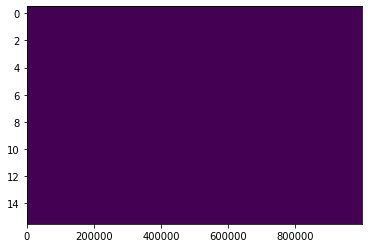

In [74]:
plt.imshow(fil.data[:, 0, :1000000], interpolation='none', aspect='auto')
plt.show()

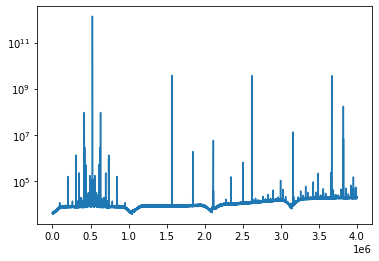

In [88]:
plt.plot(np.mean(fil.data[:, 0, :4000000], axis=0))
plt.yscale('log')
plt.show()

In [112]:
67108864/4000000

16.777216

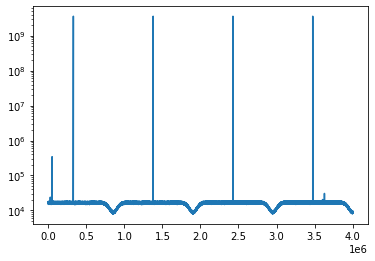

In [89]:
plt.plot(np.mean(fil.data[:, 0, -4000000:], axis=0))
plt.yscale('log')
plt.show()

In [81]:
fil.grab_data()

(array([25813.96484375, 25813.96484096, 25813.96483816, ...,
        25626.46485213, 25626.46484934, 25626.46484654]),
 array([[ 4786.092 ,  4329.6846,  3454.866 , ...,  9872.198 ,  9157.412 ,
          9167.957 ],
        [ 3588.9192,  3659.4094,  4385.77  , ...,  8989.409 ,  9066.8   ,
          8125.9688],
        [ 3929.7354,  4171.1045,  4256.8438, ...,  9622.848 ,  7871.229 ,
          8847.642 ],
        ...,
        [ 3700.687 ,  4814.6924,  4257.4663, ..., 10574.261 , 10502.1   ,
          8233.548 ],
        [ 3920.0903,  3986.8486,  4653.977 , ...,  8262.655 ,  9363.623 ,
          8011.4473],
        [ 4353.5977,  4169.968 ,  4433.8867, ...,  8812.121 ,  6835.2246,
          9735.493 ]], dtype=float32))

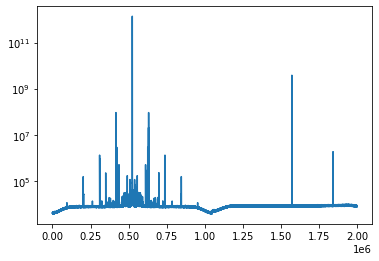

In [87]:
plt.plot(np.mean(fil.grab_data()[1][:, :2000000], axis=0))
plt.yscale('log')
plt.show()

In [86]:
fil.grab_data()[1].shape

(16, 67108864)

In [103]:
with open('header_template.txt', 'r') as f:
    lines = f.readlines()
    for line in lines:
        print('{:<80}'.format(line[:-1]))

BACKEND = 'GUPPI   '                                                            
TELESCOP= 'GBT     '                                                            
OBSERVER= 'Dave MacMahon'                                                       
PROJID  = 'AGBT20B_999_22'                                                      
FRONTEND= 'RcvrArray18_26'                                                      
NRCVR   =                    2                                                  
FD_POLN = 'CIRC    '                                                            
BMAJ    = 0.009263915095687008                                                  
BMIN    = 0.009263915095687008                                                  
SRC_NAME= 'TMC1    '                                                            
TRK_MODE= 'TRACK   '                                                            
RA_STR  = '04:41:45.7920'                                                       
RA      =              70.44

In [110]:
with open('test.raw', 'wb') as f:
    with open('header_template.txt', 'r') as t:
        lines = t.readlines()
    for line in lines:
        f.write('{:<80}'.format(line[:-1]).encode())
    # Pad the rest of the 512 byte block with zeros
    f.write(bytearray(512 - (80 * len(lines) % 512)))

In [111]:
# Test reading synthetic raw
with open('test.raw', "rb") as f:
    i = 1
    chunk = f.read(80)
    print(chunk)
    while b'END    ' not in chunk:
        chunk = f.read(80)
        print(chunk)
        i += 1
    chunk = f.read(96)
    print(chunk)
    
    chunk = f.read(512)
    print(chunk)
print(i)

b"BACKEND = 'GUPPI   '                                                            "
b"TELESCOP= 'GBT     '                                                            "
b"OBSERVER= 'Dave MacMahon'                                                       "
b"PROJID  = 'AGBT20B_999_22'                                                      "
b"FRONTEND= 'RcvrArray18_26'                                                      "
b'NRCVR   =                    2                                                  '
b"FD_POLN = 'CIRC    '                                                            "
b'BMAJ    = 0.009263915095687008                                                  '
b'BMIN    = 0.009263915095687008                                                  '
b"SRC_NAME= 'TMC1    '                                                            "
b"TRK_MODE= 'TRACK   '                                                            "
b"RA_STR  = '04:41:45.7920'                                                 

In [104]:
(80 * len(lines) % 512)

416

In [105]:
512 - 80 * len(lines) % 512

96

In [101]:
len(lines)

81

In [107]:
bytearray(100)

bytearray(b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00')

In [113]:
524288

524288

In [119]:
np.zeros([3, 2]), np.ones([3, 2])

(array([[0., 0.],
        [0., 0.],
        [0., 0.]]),
 array([[1., 1.],
        [1., 1.],
        [1., 1.]]))

In [164]:
np.hstack([np.zeros([3, 2]), np.ones([3, 2])])

array([[0., 0., 1., 1.],
       [0., 0., 1., 1.],
       [0., 0., 1., 1.]])

In [143]:
np.stack([np.zeros([3, 2]), np.arange(6).reshape(3,2)], axis=2).reshape([3, 4])

array([[0., 0., 0., 1.],
       [0., 2., 0., 3.],
       [0., 4., 0., 5.]])

In [17]:
np.stack([np.zeros([3, 4]), np.arange(12).reshape(3,4)], axis=2)

array([[[ 0.,  0.],
        [ 0.,  1.],
        [ 0.,  2.],
        [ 0.,  3.]],

       [[ 0.,  4.],
        [ 0.,  5.],
        [ 0.,  6.],
        [ 0.,  7.]],

       [[ 0.,  8.],
        [ 0.,  9.],
        [ 0., 10.],
        [ 0., 11.]]])

In [20]:
np.stack([np.zeros([3, 4]), np.arange(12).reshape(3,4)], axis=2).flatten()

array([ 0.,  0.,  0.,  1.,  0.,  2.,  0.,  3.,  0.,  4.,  0.,  5.,  0.,
        6.,  0.,  7.,  0.,  8.,  0.,  9.,  0., 10.,  0., 11.])

In [268]:
np.stack([np.zeros([3, 4]), np.arange(12).reshape(3,4)], axis=2).reshape([3, -1])

array([[ 0.,  0.,  0.,  1.,  0.,  2.,  0.,  3.],
       [ 0.,  4.,  0.,  5.,  0.,  6.,  0.,  7.],
       [ 0.,  8.,  0.,  9.,  0., 10.,  0., 11.]])

In [139]:
np.stack([np.zeros([3, 2]), np.ones([3, 2])], axis=2)

array([[[0., 1.],
        [0., 1.]],

       [[0., 1.],
        [0., 1.]],

       [[0., 1.],
        [0., 1.]]])

In [145]:
np.stack([np.zeros([3, 4]), np.arange(12).reshape(3,4), np.ones([3, 4])], axis=2).reshape([3, -1])

array([[ 0.,  0.,  1.,  0.,  1.,  1.,  0.,  2.,  1.,  0.,  3.,  1.],
       [ 0.,  4.,  1.,  0.,  5.,  1.,  0.,  6.,  1.,  0.,  7.,  1.],
       [ 0.,  8.,  1.,  0.,  9.,  1.,  0., 10.,  1.,  0., 11.,  1.]])

In [147]:
a = []
a.extend([1,2])
a

[1, 2]

In [170]:
2**10

1024

In [25]:
start = time.time()

M     = 8        # Number of taps
P     = 1024       # Number of 'branches', also fft length
W = 2**12 + 1
# W     = 2**16+1       # Number of windows of length M*P in input time stream
sample_rate = 3e9

stream_x = stg.voltage.DataStream(sample_rate=3e9)
stream_x.add_noise(v_mean=0, 
                   v_std=1)
stream_x.add_signal(f_start=(sample_rate/P * (204.2))*u.Hz, 
                    drift_rate=5000000*u.Hz/u.s, 
                    level=0.1)

stream_y = stg.voltage.DataStream(sample_rate=3e9)
stream_y.add_noise(v_mean=0, 
                   v_std=1)
stream_y.add_signal(f_start=(sample_rate/P * (204.2))*u.Hz, 
                    drift_rate=5000000*u.Hz/u.s, 
                    level=0.1)

data_write_buffer = []
bytes_left = 512

size = M * (W - 1)

stream_x.get_samples(num_samples=M*P*W)
stream_y.get_samples(num_samples=M*P*W)

pfb_sources = []
for stream in [stream_x, stream_y]:

    digitize_stream = stg.voltage.quantize_real(stream.v,
                                                target_fwhm=30,
                                                n_bits=8)

    pfb_voltages = stg.voltage.get_pfb_voltages(digitize_stream,
                                                M,
                                                P)

    # Perform quantization
    n_bits = 8
    target_fwhm = 30 * 2**n_bits / 2**8 
    q_pfb_voltages = stg.voltage.quantize_complex(pfb_voltages, 
                                                  target_fwhm=target_fwhm,
                                                  n_bits=n_bits)
    
    # Transpose to get to coarse channel x time dimensions
    pfb_sources.extend([np.real(q_pfb_voltages).T, np.imag(q_pfb_voltages).T])

# TRUNCATE TO SINGLE COMPUTE NODE HERE, NEED TO GENERALIZE
stacked_sources = np.stack(pfb_sources, axis=2).reshape([pfb_sources[0].shape[0], 4 * pfb_sources[0].shape[1]])
stacked_sources = stacked_sources[192+1:256+1, :]

end = time.time()
print((end-start)/60)

# Here is where we would write to raw files!
stacked_sources.shape

0.21375369628270466


(64, 131072)

In [274]:
q_pfb_voltages.shape

(8192, 513)

In [50]:
2**12*4

16384

In [281]:
16384/256          16384

64.0

In [ ]:
np.array(stacked_sources, dtype=np.int8).tobytes()

In [178]:
64 * 2097152

134217728

In [278]:
134217728/524288

256.0

In [316]:
32768*64

2097152

In [277]:
8192*16384

134217728

In [322]:
# WRITE HEADER AND DATA OUT TO FILE
start = time.time()
savename = "test.0000.raw"
with open(savename, 'wb') as f:
    with open('header_template.txt', 'r') as t:
        lines = t.readlines()
    for line in lines:
        f.write('{:<80}'.format(line[:-1]).encode())
    # Pad the rest of the 512 byte block with zeros
    f.write(bytearray(512 - (80 * len(lines) % 512)))
    # Write data
    f.write(np.array(stacked_sources, dtype=np.int8).tobytes())
end = time.time()
end - start

0.028072834014892578

In [309]:
#normal blocsize = 134217728
32768 * 4 

131072

In [253]:
524288 * 64 * 2 * 2

134217728

In [184]:
stacked_sources

array([[-24.,  25., -12., ...,  -1.,  -4.,  26.],
       [ 11.,   5.,   3., ..., -22.,  -8.,  17.],
       [  1.,  -5.,  13., ...,  -8., -23.,   2.],
       ...,
       [  9.,  -2.,  -4., ..., -18.,   8.,  13.],
       [ 11.,   0.,  -9., ...,   8.,   2.,  33.],
       [-27.,   0., -20., ...,   0.,   9.,   0.]])

In [174]:
stacked_sources.flatten().shape

(33554432,)

In [175]:
64*524288

33554432

In [187]:
524288 / 1024 / 16

32.0

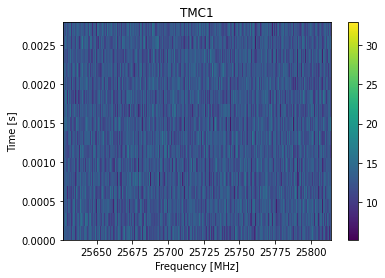

In [323]:
wf = bl.Waterfall('test.rawspec.0000.fil')
wf.plot_waterfall()

In [192]:
wf.data.shape

(32, 1, 65536)

In [193]:
1024*64

65536

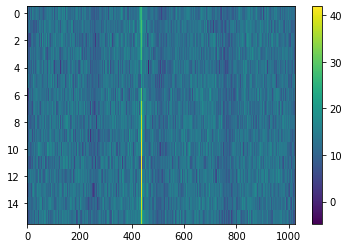

In [324]:
data = wf.data[:, 0, 256*10:256*14]
plt.imshow(db(data), aspect='auto', interpolation='none')
plt.colorbar()
plt.show()

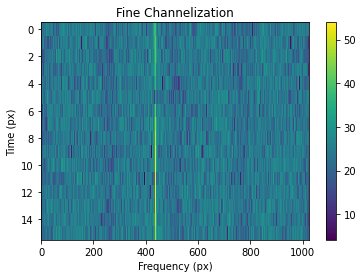

In [325]:
XX_psd = stg.voltage.get_pfb_waterfall(pfb_voltages=q_pfb_voltages,
                                               n_int=2,
                                               fftlength=256,
                                               start_channel=203,
                                               num_channels=4)
plt.imshow(db(XX_psd), 
           cmap='viridis', 
           aspect='auto', 
           interpolation='none')
plt.colorbar()
plt.xlabel("Frequency (px)")
plt.ylabel("Time (px)")
plt.title("Fine Channelization")
plt.show()

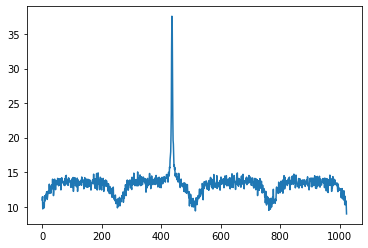

In [326]:
plt.plot(db(np.mean(data, axis=0)))
plt.show()

In [243]:
np.array(stacked_sources[:10, :10], dtype=np.int8).tobytes()

b'\x1a\x07\xf9\xf7\xfd\xf6\xfc\xfa\x11\xe2\xf8\x0e\xef\x02\xfb\x10\xf3\t\x07\xf7\xfd\n\x0c\x0c\xf0\xe6\x03\x0c\xe7\r\x06\n\x05\xfa\xed\xff\xf2\x06\xeb\x05'

In [327]:
stacked_sources[:10, :10]

array([[ 16.,  -1.,   5.,  -3.,  -3.,  13., -10.,   6., -11.,  12.],
       [-11.,  -4.,   8.,  -2., -16.,  -7.,   4.,   1.,  -4., -29.],
       [-12., -20.,   3.,  -1.,  -7.,  -4.,  10., -10.,   3.,  18.],
       [-14.,  -1.,  -1.,  -5., -17.,  -9.,  -2.,   8., -14.,   1.],
       [-20.,  15.,  -2.,   9., -24.,   0.,   6.,   7., -18.,  -5.],
       [ 27., -21.,  15.,  -3., -16.,   5.,  11., -11.,  20.,  27.],
       [-15.,  12.,  37.,  -8.,  16.,   0.,  -4., -21., -11.,   8.],
       [  0.,   9.,   8.,  -8.,  25.,   8.,  13.,   4.,   0.,   5.],
       [ -5., -11.,  -2.,  -5.,  -6.,  29., -13., -31.,  -4.,   0.],
       [ 10.,  18., -13.,   4.,  -5., -12.,  -3.,  11.,  26.,  -6.]])

In [246]:
np.frombuffer(np.array(stacked_sources[:10, :10], dtype=np.int8).tobytes(), dtype=np.int8)

array([ 26,   7,  -7,  -9,  -3, -10,  -4,  -6,  17, -30,  -8,  14, -17,
         2,  -5,  16, -13,   9,   7,  -9,  -3,  10,  12,  12, -16, -26,
         3,  12, -25,  13,   6,  10,   5,  -6, -19,  -1, -14,   6, -21,
         5], dtype=int8)

In [30]:
start = time.time()

M     = 8        # Number of taps
P     = 1024       # Number of 'branches', also fft length
W = 2**12 + 1
# W     = 2**16+1       # Number of windows of length M*P in input time stream
sample_rate = 3e9

stream_x = stg.voltage.DataStream(sample_rate=3e9)
stream_x.add_noise(v_mean=0, 
                   v_std=1)
stream_x.add_signal(f_start=(sample_rate/P * (204.2))*u.Hz, 
                    drift_rate=5000000*u.Hz/u.s, 
                    level=0.1)

stream_y = stg.voltage.DataStream(sample_rate=3e9)
stream_y.add_noise(v_mean=0, 
                   v_std=1)
stream_y.add_signal(f_start=(sample_rate/P * (204.2))*u.Hz, 
                    drift_rate=5000000*u.Hz/u.s, 
                    level=0.1)

data_write_buffer = []
bytes_left = 512

size = M * (W - 1)

stream_x.get_samples(num_samples=M*P*W)
stream_y.get_samples(num_samples=M*P*W)

stacked_sources = np.empty((P // 2 + 1, 4 * M * (W - 1)))
for i, stream in enumerate([stream_x, stream_y]):

    digitize_stream = stg.voltage.quantize_real(stream.v,
                                                target_fwhm=30,
                                                n_bits=8)

    pfb_voltages = stg.voltage.get_pfb_voltages(digitize_stream,
                                                M,
                                                P)

    # Perform quantization
    n_bits = 8
    target_fwhm = 30 * 2**n_bits / 2**8 
    q_pfb_voltages = stg.voltage.quantize_complex(pfb_voltages, 
                                                  target_fwhm=target_fwhm,
                                                  n_bits=n_bits)
    
    # Transpose to get to coarse channel x time dimensions
#     pfb_sources.extend([np.real(q_pfb_voltages).T, np.imag(q_pfb_voltages).T])
    stacked_sources[:, 2*i::4] = np.real(q_pfb_voltages).T
    stacked_sources[:, 2*i+1::4] = np.imag(q_pfb_voltages).T
    
    
# TRUNCATE TO SINGLE COMPUTE NODE HERE, NEED TO GENERALIZE
# stacked_sources = np.stack(pfb_sources, axis=2).reshape([pfb_sources[0].shape[0], 4 * pfb_sources[0].shape[1]])
stacked_sources = stacked_sources[192+1:256+1, :]

end = time.time()
print((end-start)/60)

# Here is where we would write to raw files!
stacked_sources.shape

0.20852413574854534


(64, 131072)

In [31]:
with open('header_template.txt', 'r') as t:
    lines = t.readlines()

In [34]:
keyword, _, lines[0].split()

['BACKEND', '=', "'GUPPI", "'"]

In [39]:
f'{"receiving":<8}'

'receiving'

In [44]:
line = lines[2]
line[0:8], line[10:]

('OBSERVER',
 "'Dave MacMahon'                                                       \n")

In [49]:
line = lines[11]
line[0:8], line[10:]

('RA_STR  ',
 "'04:41:45.7920'                                                       \n")

In [50]:
float(line[10:])

ValueError: could not convert string to float: "'04:41:45.7920'                                                       \n"

In [70]:
key = 'RA'
value = 70.4408 
if isinstance(value, str):
    value = f"'{value: <8}'"
    line = f"{key:<8}= {value:<20}"
else:
    line = f"{key:<8}= {value:>20}"
line = f"{line:<80}"
line

'RA      =              70.4408                                                  '

In [71]:
lines[12]

'RA      =              70.4408                                                  \n'

In [72]:
def format_header_line(key, value):
    if isinstance(value, str):
        value = f"'{value: <8}'"
        line = f"{key:<8}= {value:<20}"
    else:
        line = f"{key:<8}= {value:>20}"
    line = f"{line:<80}"
    return line

In [76]:
'header. '.strip()

'header.'

In [ ]:
TELESCOP = 'SETIGEN'
OBSERVER = 'SETIGEN'
SRC_NAME = 'SYNTHETIC'

important:
NBITS = self.n_bits
CHAN_BW = self.sample_rate / self.n_branches
OBSNCHAN = n_chans
NPOL = self.n_pols
BLOCSIZE = self.block_size
OBSFREQ = center_freq in record function
SCANLEN = self.obs_length
OBSBW = self.sample_rate / self.n_branches * n_chans
TBIN = self.n_branches / self.sample_rate 

In [84]:
(f'{1024/3e9:.14E}')

20

In [87]:
f"{300:.1f}"

'300.000'

In [51]:
2097152 / 2 / 2 / 8 / 2 / 4

8192.0

In [53]:
1024 // 2 * 2 * 2 * 8 * 8192 / 512 * 4

1048576.0

In [3]:
import cupy

In [4]:
sample_rate = 3e9
num_taps = 8
num_branches = 1024

stream_x = stg.voltage.DataStream(sample_rate=sample_rate)
stream_x.add_noise(v_mean=0, 
                   v_std=1)
stream_x.add_signal(f_start=(sample_rate/num_branches * (204.2))*u.Hz, 
                    drift_rate=5000000*u.Hz/u.s, 
                    level=0.1)

stream_y = stg.voltage.DataStream(sample_rate=sample_rate)
stream_y.add_noise(v_mean=0, 
                   v_std=1)
stream_y.add_signal(f_start=(sample_rate/num_branches * (204.2))*u.Hz, 
                    drift_rate=5000000*u.Hz/u.s, 
                    level=0.1)

digitizer = stg.voltage.RealQuantizer(target_fwhm=32,
                                      num_bits=8)
filterbank = stg.voltage.PolyphaseFilterbank(num_taps=num_taps, 
                                             num_branches=num_branches)
requantizer = stg.voltage.ComplexQuantizer(target_fwhm=32,
                                           num_bits=8)

rvp = stg.voltage.RawVoltagePipeline(stream_x,
                                     stream_y,
                                     block_size=2097152//4,
                                     blocks_per_file=128,
                                     digitizer=digitizer,
                                     filterbank=filterbank,
                                     requantizer=requantizer)

rvp.record(raw_file_stem='test',
           num_blocks=1, 
           start_chan=202,
           num_chans=4,
           length_mode='num_blocks',
           header_dict={'HELLO': 'test_value'})

Creating block 0...
noise 0.7928121089935303
signal 1.663341760635376
samp 2.7899622917175293
quan 0.6330235004425049
chan 1.3468070030212402
requan 0.9268288612365723
trunc 0.37475037574768066
noise 0.8019733428955078
signal 1.6699004173278809
samp 2.8575820922851562
quan 0.8500137329101562
chan 1.3786211013793945
requan 1.0982022285461426
trunc 0.30699801445007324
Block 0 recorded


In [13]:
sample_rate = 3e9
num_taps = 8
num_branches = 1024

stream_x = stg.voltage.DataStream(sample_rate=sample_rate)
stream_x.add_noise(v_mean=0, 
                   v_std=1)
stream_x.add_signal(f_start=(sample_rate/num_branches * (204.2))*u.Hz, 
                    drift_rate=5000000*u.Hz/u.s, 
                    level=0.1)

stream_y = stg.voltage.DataStream(sample_rate=sample_rate)
stream_y.add_noise(v_mean=0, 
                   v_std=1)
stream_y.add_signal(f_start=(sample_rate/num_branches * (204.2))*u.Hz, 
                    drift_rate=5000000*u.Hz/u.s, 
                    level=0.1)

digitizer = stg.voltage.RealQuantizer(target_fwhm=32,
                                      num_bits=8)
filterbank = stg.voltage.PolyphaseFilterbank(num_taps=num_taps, 
                                             num_branches=num_branches)
requantizer = stg.voltage.ComplexQuantizer(target_fwhm=32,
                                           num_bits=8)

rvp = stg.voltage.RawVoltagePipeline(stream_x,
                                     stream_y,
                                     block_size=2097152//4,
                                     blocks_per_file=128,
                                     digitizer=digitizer,
                                     filterbank=filterbank,
                                     requantizer=requantizer)

rvp.record(raw_file_stem='test',
           num_blocks=1, 
           start_chan=202,
           num_chans=4,
           length_mode='num_blocks',
           header_dict={'HELLO': 'test_value'})

Creating block 0...
noise 0.005586147308349609
signal 0.0006361007690429688
samp 0.006662845611572266
quan 0.6210989952087402
chan 1.9448809623718262
requan 0.5397231578826904
trunc 0.00030541419982910156
noise 0.021638870239257812
signal 0.0012769699096679688
samp 0.023530006408691406
quan 0.5509018898010254
chan 1.932222843170166
requan 0.5403444766998291
trunc 0.0002963542938232422
Block 0 recorded


In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import blimpy as bl
import pandas as pd
from astropy import units as u

import sys, os, glob, errno
import csv
import json
import h5py
import time
from astropy.stats import sigma_clip


from scipy.signal import butter, lfilter, filtfilt
import scipy.signal

sys.path.insert(0, "/home/bryanb/setigen/")
import setigen as stg

def db(x):
    """ Convert linear value to dB value """
    return 10*np.log10(x)

sample_rate = 3e9
num_taps = 8
num_branches = 1024

stream_x = stg.voltage.DataStream(sample_rate=sample_rate)
stream_x.add_noise(v_mean=0, 
                   v_std=1)
stream_x.add_signal(f_start=(sample_rate/num_branches * (204.2))*u.Hz, 
                    drift_rate=5000000*u.Hz/u.s, 
                    level=0.1)

stream_y = stg.voltage.DataStream(sample_rate=sample_rate)
stream_y.add_noise(v_mean=0, 
                   v_std=1)
stream_y.add_signal(f_start=(sample_rate/num_branches * (204.2))*u.Hz, 
                    drift_rate=5000000*u.Hz/u.s, 
                    level=0.1)

digitizer = stg.voltage.RealQuantizer(target_fwhm=32,
                                      num_bits=8)
filterbank = stg.voltage.PolyphaseFilterbank(num_taps=num_taps, 
                                             num_branches=num_branches)
requantizer = stg.voltage.ComplexQuantizer(target_fwhm=32,
                                           num_bits=8)

rvp = stg.voltage.RawVoltagePipeline(stream_x,
                                     stream_y,
                                     block_size=2097152//4,
                                     blocks_per_file=128,
                                     digitizer=digitizer,
                                     filterbank=filterbank,
                                     requantizer=requantizer)

rvp.record(raw_file_stem='test',
           num_blocks=1, 
           start_chan=202,
           num_chans=4,
           length_mode='num_blocks',
           header_dict={'HELLO': 'test_value'})

bshuf filter already loaded, skip it.
lz4 filter already loaded, skip it.
zfp filter already loaded, skip it.


Creating block 0...
noise 0.05310821533203125
signal 0.1578660011291504
samp 0.3582446575164795
-standard dev 0.21335983276367188
-around 0.3066418170928955
-truncate 0.30489253997802734
-as int 0.04864788055419922
quan 0.8737659454345703
--pfb 0.8380935192108154
--rfft 0.2002408504486084
chan 1.0385327339172363
-standard dev 0.1258847713470459
-around 0.05932807922363281
-truncate 0.004712581634521484
-as int 0.0001316070556640625
-standard dev 0.0004584789276123047
-around 0.0006308555603027344
-truncate 0.012260198593139648
-as int 0.00012922286987304688
requan 0.3025028705596924
trunc 0.057359933853149414
noise 0.0210726261138916
signal 0.0005853176116943359
samp 0.022322893142700195
-standard dev 0.0004832744598388672
-around 0.0006079673767089844
-truncate 0.03191018104553223
-as int 0.00014662742614746094
quan 0.033414602279663086
--pfb 0.003307819366455078
--rfft 0.0002715587615966797
chan 0.003675699234008789
-standard dev 0.0004611015319824219
-around 0.0006246566772460938
-t

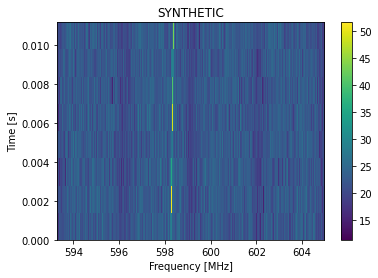

In [140]:
wf = bl.Waterfall('test.rawspec.0000.fil')
wf.plot_waterfall()

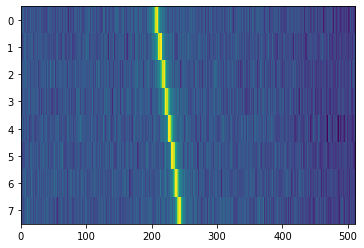

In [141]:
fftlen = 1024
plt.imshow(db(wf.data[:, 0, int(1.5*fftlen):2*fftlen]), aspect='auto', interpolation='none')

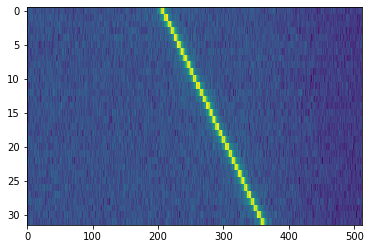

In [71]:
plt.imshow(db(wf.data[:, 0, int(1.5*1024):2*1024]), aspect='auto', interpolation='none')

In [4]:
a = np.random.default_rng(24)
print(a.normal())
print(a.normal())

1.3507473233305594
0.34309058470100834


In [106]:
start = time.time()

sample_rate = 3e9
num_taps = 8
num_branches = 1024

stream_x = stg.voltage.DataStream(sample_rate=sample_rate)
stream_x.add_noise(v_mean=0, 
                   v_std=1)
stream_x.add_signal(f_start=(sample_rate/num_branches * (204.2))*u.Hz, 
                    drift_rate=50*u.Hz/u.s, 
                    level=0.1)

stream_y = stg.voltage.DataStream(sample_rate=sample_rate)
stream_y.add_noise(v_mean=0, 
                   v_std=1)
stream_y.add_signal(f_start=(sample_rate/num_branches * (204.2))*u.Hz, 
                    drift_rate=50*u.Hz/u.s, 
                    level=0.1)

digitizer = stg.voltage.RealQuantizer(target_fwhm=32,
                                      num_bits=8)
filterbank = stg.voltage.PolyphaseFilterbank(num_taps=num_taps, 
                                             num_branches=num_branches)
requantizer = stg.voltage.ComplexQuantizer(target_fwhm=32,
                                           num_bits=8)

rvp = stg.voltage.RawVoltagePipeline(stream_x,
                                     stream_y,
                                     block_size=134217728//4,
                                     blocks_per_file=128,
                                     digitizer=digitizer,
                                     filterbank=filterbank,
                                     requantizer=requantizer)

rvp.record(raw_file_stem='test',
           num_blocks=1, 
           start_chan=192,
           num_chans=64,
           length_mode='num_blocks',
           header_dict={'HELLO': 'test_value'})

print(time.time() - start)

Creating block 0...
init 4.57763671875e-05
samp 12.005852222442627
quan 2.6183958053588867
chan 6.9456562995910645
requan 3.684037685394287
trunc 1.5182898044586182
samp 12.159636735916138
quan 3.2574875354766846
chan 6.523109436035156
requan 4.421532869338989
trunc 1.2616326808929443
Block 0 recorded
54.81797647476196


In [4]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import blimpy as bl
import pandas as pd
from astropy import units as u

import sys, os, glob, errno
import csv
import json
import h5py
import time
from astropy.stats import sigma_clip


from scipy.signal import butter, lfilter, filtfilt
import scipy.signal

sys.path.insert(0, "/home/bryanb/setigen/")
import setigen as stg

def db(x):
    """ Convert linear value to dB value """
    return 10*np.log10(x)













start = time.time()

sample_rate = 3e9
num_taps = 8
num_branches = 1024

stream_x = stg.voltage.DataStream(sample_rate=sample_rate)
stream_x.add_noise(v_mean=0, 
                   v_std=1)
stream_x.add_signal(f_start=(sample_rate/num_branches * (204.2))*u.Hz, 
                    drift_rate=50*u.Hz/u.s, 
                    level=0.1)

stream_y = stg.voltage.DataStream(sample_rate=sample_rate)
stream_y.add_noise(v_mean=0, 
                   v_std=1)
stream_y.add_signal(f_start=(sample_rate/num_branches * (204.2))*u.Hz, 
                    drift_rate=50*u.Hz/u.s, 
                    level=0.1)

digitizer = stg.voltage.RealQuantizer(target_fwhm=32,
                                      num_bits=8)
filterbank = stg.voltage.PolyphaseFilterbank(num_taps=num_taps, 
                                             num_branches=num_branches)
requantizer = stg.voltage.ComplexQuantizer(target_fwhm=32,
                                           num_bits=8)

rvp = stg.voltage.RawVoltagePipeline(stream_x,
                                     stream_y,
                                     block_size=134217728//4,
                                     blocks_per_file=128,
                                     digitizer=digitizer,
                                     filterbank=filterbank,
                                     requantizer=requantizer)

rvp.record(raw_file_stem='test',
           num_blocks=1, 
           start_chan=192,
           num_chans=64,
           length_mode='num_blocks',
           header_dict={'HELLO': 'test_value'})

print(time.time() - start)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Creating block 0...
noise 5.833271741867065
signal 6.4104650020599365
samp 13.452741384506226
-standard dev 0.0017578601837158203
-around 0.9086968898773193
-truncate 0.25572967529296875
-as int 0.3566148281097412
quan 1.523273229598999
--pfb 7.826666831970215
--rfft 1.2154653072357178
chan 9.044958114624023
-standard dev 0.03187751770019531
-around 0.4850935935974121
-truncate 0.12769031524658203
-as int 0.17889142036437988
-standard dev 0.032143592834472656
-around 0.48532938957214355
-truncate 0.12722158432006836
-as int 0.17891931533813477
requan 2.2623205184936523
trunc 1.2828755378723145
noise 5.745299577713013
signal 6.191612720489502
samp 13.135963439941406
-standard dev 0.0006117820739746094
-around 0.8872888088226318
-truncate 0.25243711471557617
-as int 0.3572571277618408
quan 1.4979817867279053
--pfb 8.265237808227539
--rfft 1.2218878269195557
chan 9.489758491516113
-standard dev 0.03197

In [3]:



start = time.time()

sample_rate = 3e9
num_taps = 8
num_branches = 1024

stream_x = stg.voltage.DataStream(sample_rate=sample_rate)
stream_x.add_noise(v_mean=0, 
                   v_std=1)
stream_x.add_signal(f_start=(sample_rate/num_branches * (204.2))*u.Hz, 
                    drift_rate=50*u.Hz/u.s, 
                    level=0.1)

stream_y = stg.voltage.DataStream(sample_rate=sample_rate)
stream_y.add_noise(v_mean=0, 
                   v_std=1)
stream_y.add_signal(f_start=(sample_rate/num_branches * (204.2))*u.Hz, 
                    drift_rate=50*u.Hz/u.s, 
                    level=0.1)

digitizer = stg.voltage.RealQuantizer(target_fwhm=32,
                                      num_bits=8)
filterbank = stg.voltage.PolyphaseFilterbank(num_taps=num_taps, 
                                             num_branches=num_branches)
requantizer = stg.voltage.ComplexQuantizer(target_fwhm=32,
                                           num_bits=8)

rvp = stg.voltage.RawVoltagePipeline(stream_x,
                                     stream_y,
                                     block_size=134217728//4,
                                     blocks_per_file=128,
                                     digitizer=digitizer,
                                     filterbank=filterbank,
                                     requantizer=requantizer)

rvp.record(raw_file_stem='test',
           num_blocks=1, 
           start_chan=192,
           num_chans=64,
           length_mode='num_blocks',
           header_dict={'HELLO': 'test_value'})

print(time.time() - start)

Creating block 0...
noise 5.800992965698242
signal 6.453568696975708
samp 13.506627082824707
-standard dev 0.0009238719940185547
-around 0.8833317756652832
-truncate 0.25362133979797363
-as int 0.35591554641723633
quan 1.4942817687988281
--pfb 4.543341636657715
--rfft 1.212423324584961
chan 5.8027331829071045
-standard dev 0.03137612342834473
-around 0.4860522747039795
-truncate 0.12534689903259277
-as int 0.17835092544555664
-standard dev 0.03184938430786133
-around 0.48809003829956055
-truncate 0.13323640823364258
-as int 0.18551898002624512
requan 2.3366475105285645
trunc 1.2909777164459229
noise 5.744620084762573
signal 6.180871248245239
samp 13.120853424072266
-standard dev 0.0007703304290771484
-around 0.9082813262939453
-truncate 0.25462770462036133
-as int 0.3580150604248047
quan 1.522120475769043
--pfb 4.555866003036499
--rfft 1.2121374607086182
chan 5.810188055038452
-standard dev 0.032140254974365234
-around 0.48346614837646484
-truncate 0.1267697811126709
-as int 0.17905664

In [7]:
A = np.arange(24).reshape((6, 4))
A

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23]])

In [8]:
B = np.arange(8).reshape((2, 4))
B

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

In [11]:
I = np.expand_dims(np.arange(2), 0) + np.expand_dims(np.arange(4), 0).T
I

array([[0, 1],
       [1, 2],
       [2, 3],
       [3, 4]])

In [14]:
A[I], A[I].shape

(array([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7]],
 
        [[ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],
 
        [[ 8,  9, 10, 11],
         [12, 13, 14, 15]],
 
        [[12, 13, 14, 15],
         [16, 17, 18, 19]]]),
 (4, 2, 4))

In [16]:
A[I] * B

array([[[  0,   1,   4,   9],
        [ 16,  25,  36,  49]],

       [[  0,   5,  12,  21],
        [ 32,  45,  60,  77]],

       [[  0,   9,  20,  33],
        [ 48,  65,  84, 105]],

       [[  0,  13,  28,  45],
        [ 64,  85, 108, 133]]])

In [17]:
np.sum(A[I] * B, axis=1)

array([[ 16,  26,  40,  58],
       [ 32,  50,  72,  98],
       [ 48,  74, 104, 138],
       [ 64,  98, 136, 178]])

In [3]:
np.expand_dims(np.arange(10), 0) + np.expand_dims(np.arange(5), 0).T

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
       [ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
       [ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
       [ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13]])

In [ ]:
np.expand_dims(np.arange(num_taps), 0) + np.expand_dims(np.arange((W - 1) * num_taps), 0).T

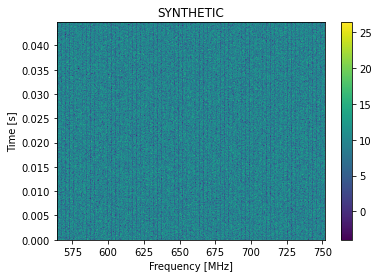

In [107]:
wf = bl.Waterfall('test.rawspec.0000.fil')
wf.plot_waterfall()

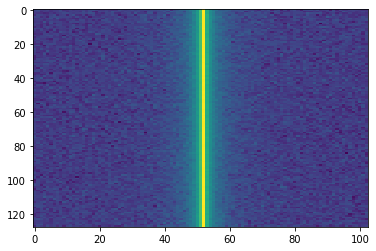

In [88]:
plt.imshow(db(wf.data[:, 0, int(11.65*1024):int(11.75*1024)]), aspect='auto', interpolation='none')

In [7]:
sample_rate = 3e9
num_taps = 8
num_branches = 1024

stream_x = stg.voltage.DataStream(sample_rate=sample_rate)
stream_x.add_noise(v_mean=0, 
                   v_std=1)
stream_x.add_signal(f_start=(sample_rate/num_branches * (204.2))*u.Hz, 
                    drift_rate=5000000*u.Hz/u.s, 
                    level=0.1)

stream_y = stg.voltage.DataStream(sample_rate=sample_rate)
stream_y.add_noise(v_mean=0, 
                   v_std=1)
stream_y.add_signal(f_start=(sample_rate/num_branches * (204.2))*u.Hz, 
                    drift_rate=5000000*u.Hz/u.s, 
                    level=0.1)

digitizer = stg.voltage.RealQuantizer(target_fwhm=32,
                                      num_bits=8)
filterbank = stg.voltage.PolyphaseFilterbank(num_taps=num_taps, 
                                             num_branches=num_branches)
requantizer = stg.voltage.ComplexQuantizer(target_fwhm=32,
                                           num_bits=8)

rvp = stg.voltage.RawVoltagePipeline(stream_x,
                                     stream_y,
                                     block_size=2097152//4,
                                     blocks_per_file=128,
                                     digitizer=digitizer,
                                     filterbank=filterbank,
                                     requantizer=requantizer)

rvp.record(raw_file_stem='test',
           num_blocks=1, 
           start_chan=202,
           num_chans=4,
           length_mode='num_blocks',
           header_dict={'HELLO': 'test_value'})

Creating block 0...
noise 1.4557108879089355
signal 1.5328881740570068
samp 3.3534023761749268
-standard dev 0.0007195472717285156
-around 0.22791290283203125
-truncate 0.06351304054260254
-as int 0.08917546272277832
quan 0.3819267749786377
--pfb 1.7241203784942627
--rfft 0.31374263763427734
chan 2.039011240005493
-standard dev 0.03162097930908203
-around 0.12166476249694824
-truncate 0.03213763236999512
-as int 0.04567122459411621
-standard dev 0.03146696090698242
-around 0.12101173400878906
-truncate 0.025896549224853516
-as int 0.04543709754943848
requan 0.6078534126281738
trunc 0.32444071769714355
noise 1.435307264328003
signal 1.4573352336883545
samp 3.195638656616211
-standard dev 0.0004730224609375
-around 0.22815346717834473
-truncate 0.06450247764587402
-as int 0.08881425857543945
quan 0.3824470043182373
--pfb 1.7482795715332031
--rfft 0.30506324768066406
chan 2.054471969604492
-standard dev 0.03166937828063965
-around 0.12084841728210449
-truncate 0.025776147842407227
-as int

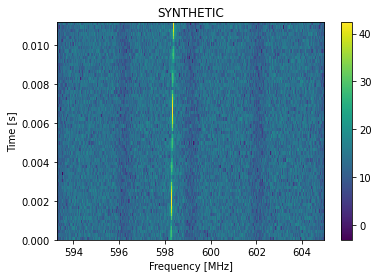

In [8]:
wf = bl.Waterfall('test.rawspec.0000.fil')
wf.plot_waterfall()

In [ ]:
XX_psd = stg.voltage.get_pfb_waterfall(pfb_voltages=q_pfb_voltages,
                                               n_int=2,
                                               fftlength=256,
                                               start_channel=203,
                                               num_channels=4)
plt.imshow(db(XX_psd), 
           cmap='viridis', 
           aspect='auto', 
           interpolation='none')
plt.colorbar()
plt.xlabel("Frequency (px)")
plt.ylabel("Time (px)")
plt.title("Fine Channelization")
plt.show()

<ipython-input-6-94a27675fa2a>:2: UserWarning: Attempting to set identical left == right == -0.5 results in singular transformations; automatically expanding.
  plt.imshow(db(data), aspect='auto', interpolation='none')


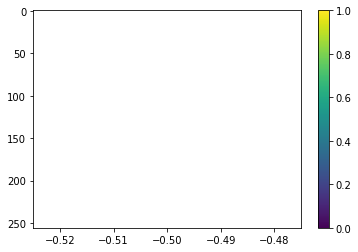

In [6]:
data = wf.data[:, 0, 256*10:256*14]
plt.imshow(db(data), aspect='auto', interpolation='none')
plt.colorbar()
plt.show()

In [81]:
f"{'test':<80}".encode()


b'test                                                                            '

In [6]:
# Test reading synthetic raw
with open('test.0000.raw', "rb") as f:
    i = 1
    chunk = f.read(80)
    print(chunk)
    while b'END    ' not in chunk:
        chunk = f.read(80)
        print(chunk)
        i += 1
    chunk = f.read((512 - (80 * i % 512)))
    print(chunk)
    
    chunk = f.read(2097152//4)
#     print(chunk)
print(i)

b"BACKEND = 'GUPPI   '                                                            "
b"TELESCOP= 'SETIGEN '                                                            "
b"OBSERVER= 'SETIGEN '                                                            "
b"PROJID  = 'AGBT20B_999_22'                                                      "
b"FRONTEND= 'RcvrArray18_26'                                                      "
b'NRCVR   =                    2                                                  '
b"FD_POLN = 'CIRC    '                                                            "
b'BMAJ    = 0.009263915095687008                                                  '
b'BMIN    = 0.009263915095687008                                                  '
b"SRC_NAME= 'SYNTHETIC'                                                           "
b"TRK_MODE= 'TRACK   '                                                            "
b"RA_STR  = '04:41:45.7920'                                                 

In [7]:
len(chunk)

524288

In [8]:
np.frombuffer(chunk, dtype=np.int8).reshape((4, -1)).shape

(4, 131072)

In [9]:
rawbuffer = np.frombuffer(chunk, dtype=np.int8).reshape((4, -1))
rawbuffer_x = rawbuffer[:, 0::4] + rawbuffer[:, 1::4] * 1j
rawbuffer_y = rawbuffer[:, 2::4] + rawbuffer[:, 3::4] * 1j

In [10]:
def get_pfb_waterfall(pfb_voltages_x, pfb_voltages_y, int_factor, fftlength, num_channels):
    """
    Perform fine channelization on input complex voltage after filterbank,
    for a single polarization. 
    
    int_factor specifies the number of time samples to integrate.
    """
    
    XX_psd = np.zeros((num_channels, pfb_voltages_x.shape[0] // fftlength, fftlength))
    for pfb_voltages in pfb_voltages_x, pfb_voltages_y:
        X_samples = pfb_voltages.T
        X_samples = X_samples[:, :np.around(X_samples.shape[1] // fftlength) * fftlength]
        X_samples = X_samples.reshape((num_channels, X_samples.shape[1] // fftlength, fftlength))

        XX = np.fft.fft(X_samples, fftlength, axis=2) 
        XX = np.fft.fftshift(XX, axes=2)
        XX_psd += np.abs(XX)**2 / fftlength

    XX_psd = np.concatenate(XX_psd, axis=1)
    
    # Integrate over time, trimming if necessary
    XX_psd = XX_psd[:np.around(XX_psd.shape[0] // int_factor) * int_factor]
    XX_psd = XX_psd.reshape(XX_psd.shape[0] // int_factor, int_factor, XX_psd.shape[1])
    XX_psd = XX_psd.mean(axis=1)
    
    return XX_psd

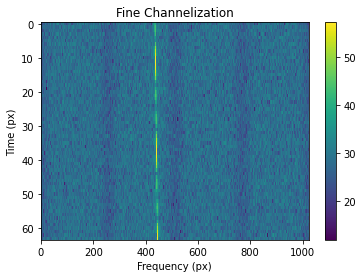

In [11]:
XX_psd = get_pfb_waterfall(rawbuffer_x.T, rawbuffer_y.T,
                                               int_factor=2,
                                               fftlength=256, 
                                  num_channels=4)
plt.imshow(db(XX_psd), 
           cmap='viridis', 
           aspect='auto', 
           interpolation='none')
plt.colorbar()
plt.xlabel("Frequency (px)")
plt.ylabel("Time (px)")
plt.title("Fine Channelization")
plt.show()

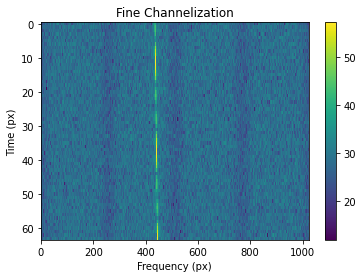

In [12]:
XX_psd = stg.voltage.get_pfb_waterfall(rawbuffer_x.T, rawbuffer_y.T,
                                               int_factor=2,
                                               fftlength=256)
plt.imshow(db(XX_psd), 
           cmap='viridis', 
           aspect='auto', 
           interpolation='none')
plt.colorbar()
plt.xlabel("Frequency (px)")
plt.ylabel("Time (px)")
plt.title("Fine Channelization")
plt.show()

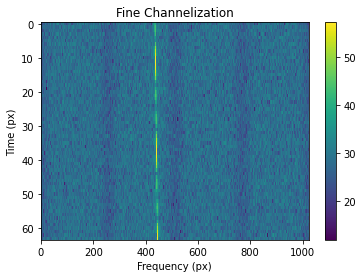

In [13]:
XX_psd = stg.voltage.get_waterfall_from_raw('test.0000.raw',
                                            524288,
                                            int_factor=2,
                                            fftlength=256)
plt.imshow(db(XX_psd), 
           cmap='viridis', 
           aspect='auto', 
           interpolation='none')
plt.colorbar()
plt.xlabel("Frequency (px)")
plt.ylabel("Time (px)")
plt.title("Fine Channelization")
plt.show()

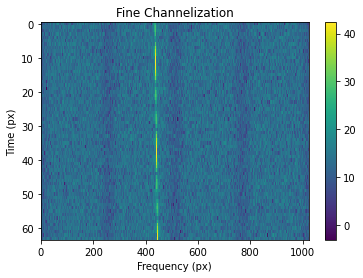

In [14]:
wf = bl.Waterfall('test.rawspec.0000.fil')
plt.imshow(db(wf.data.squeeze()), 
           cmap='viridis', 
           aspect='auto', 
           interpolation='none')
plt.colorbar()
plt.xlabel("Frequency (px)")
plt.ylabel("Time (px)")
plt.title("Fine Channelization")
plt.show()

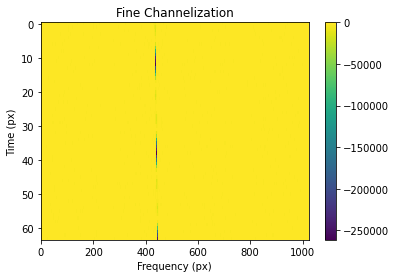

In [68]:
plt.imshow((wf.data.squeeze()) - (XX_psd), 
           cmap='viridis', 
           aspect='auto', 
           interpolation='none')
plt.colorbar()
plt.xlabel("Frequency (px)")
plt.ylabel("Time (px)")
plt.title("Fine Channelization")
plt.show()

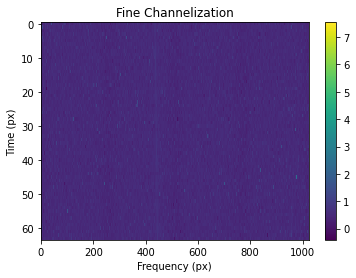

In [70]:
plt.imshow(db(wf.data.squeeze()) / db(XX_psd), 
           cmap='viridis', 
           aspect='auto', 
           interpolation='none')
plt.colorbar()
plt.xlabel("Frequency (px)")
plt.ylabel("Time (px)")
plt.title("Fine Channelization")
plt.show()

In [15]:
2097152//4

524288

In [17]:
num_chans = 64
num_blocks = 524288
num_blocks * 8


4194304

In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import blimpy as bl
import pandas as pd
from astropy import units as u

import sys, os, glob, errno
import csv
import json
import h5py
import time
from astropy.stats import sigma_clip


from scipy.signal import butter, lfilter, filtfilt
import scipy.signal

sys.path.insert(0, "/home/bryanb/setigen/")
import setigen as stg

def db(x):
    """ Convert linear value to dB value """
    return 10*np.log10(x)


start = time.time()

sample_rate = 3e9
num_taps = 8
num_branches = 1024

stream_x = stg.voltage.DataStream(sample_rate=sample_rate)
stream_x.add_noise(v_mean=0, 
                   v_std=1)
stream_x.add_signal(f_start=(sample_rate/num_branches * (204.2))*u.Hz, 
                    drift_rate=50*u.Hz/u.s, 
                    level=0.1)

stream_y = stg.voltage.DataStream(sample_rate=sample_rate)
stream_y.add_noise(v_mean=0, 
                   v_std=1)
stream_y.add_signal(f_start=(sample_rate/num_branches * (204.2))*u.Hz, 
                    drift_rate=50*u.Hz/u.s, 
                    level=0.1)

digitizer = stg.voltage.RealQuantizer(target_fwhm=32,
                                      num_bits=8)
filterbank = stg.voltage.PolyphaseFilterbank(num_taps=num_taps, 
                                             num_branches=num_branches)
requantizer = stg.voltage.ComplexQuantizer(target_fwhm=32,
                                           num_bits=8)

rvp = stg.voltage.RawVoltagePipeline(stream_x,
                                     stream_y,
                                     block_size=134217728 // 4,
                                     blocks_per_file=128,
                                     digitizer=digitizer,
                                     filterbank=filterbank,
                                     requantizer=requantizer)

rvp.record(raw_file_stem='test',
           num_blocks=1, 
           start_chan=192,
           num_chans=64,
           factor=4,
           length_mode='num_blocks',
           header_dict={'HELLO': 'test_value'})

print(time.time() - start)

bshuf filter already loaded, skip it.
lz4 filter already loaded, skip it.
zfp filter already loaded, skip it.


Creating block 0...
noise 0.05221962928771973
signal 0.15804171562194824
samp 0.36234426498413086
33562624
-standard dev 0.2941257953643799
-around 0.3407421112060547
-truncate 0.31707000732421875
-as int 0.04887962341308594
quan 1.0010194778442383
chan 0.5381393432617188
32768
-standard dev 0.1484971046447754
-around 0.06224870681762695
-truncate 0.0009620189666748047
-as int 4.38690185546875e-05
32768
-standard dev 0.0009477138519287109
-around 0.00019097328186035156
-truncate 0.00048160552978515625
-as int 0.0003135204315185547
requan 0.31920790672302246
trunc 0.1712963581085205
noise 6.246566772460938e-05
signal 0.0005705356597900391
samp 0.05634760856628418
33554432
-standard dev 0.02322220802307129
-around 0.0007061958312988281
-truncate 0.007670164108276367
-as int 0.0002999305725097656
quan 0.03248000144958496
chan 0.05710554122924805
32768
-standard dev 0.03260397911071777
-around 0.00020122528076171875
-truncate 0.0012140274047851562
-as int 0.00031113624572753906
32768
-stan

In [4]:
1024*524288/2/2/64 * 2   * 2*8

67108864.0

In [7]:
import numpy as np
np.arange(3, 10, 4) + 2

array([5, 9])

In [13]:
np.arange(1000)[np.arange(3, 10, 4) + 2]

array([5, 9])

In [2]:
33562624 * 8 / 1e6

268.500992

In [3]:
7631/269

28.36802973977695

In [6]:
1024 * 8 * 134217728/2/2/8/64/16

33554432.0

In [7]:
33554432 * 8 * 2/1e6

536.870912

In [15]:
24/5

4.8

In [17]:
import numpy as np
np.arange(0, 24, 5)

array([ 0,  5, 10, 15, 20])

In [19]:
np.arange(5) * 5

array([ 0,  5, 10, 15, 20])

In [26]:
int(24 / 7)

3

In [55]:
size = 100
factor = 12

subblock_len = np.ceil(size / factor)
subblock_len, np.arange(factor) * subblock_len

(9.0, array([ 0.,  9., 18., 27., 36., 45., 54., 63., 72., 81., 90., 99.]))

In [37]:
np.ceil(size / factor)

4.0

In [38]:
size/factor

3.4285714285714284

In [231]:
import numpy as np

num_chans = 4
M = 5
W = 25
T = M * W
num_pols = 2
block_size = num_chans * T * 2 * num_pols

factor = 7

v = np.arange(block_size).reshape((num_chans, -1))
v

array([[   0,    1,    2, ...,  497,  498,  499],
       [ 500,  501,  502, ...,  997,  998,  999],
       [1000, 1001, 1002, ..., 1497, 1498, 1499],
       [1500, 1501, 1502, ..., 1997, 1998, 1999]])

In [232]:
T = block_size / 2 / num_pols / num_chans
T

125.0

In [233]:
subblock_T = np.ceil(T / factor)
subblock_T

18.0

In [234]:
np.ceil(T / M / factor)

4.0

In [235]:
M * factor

35

In [236]:
T - np.floor(T / M / factor) * M * factor

20.0

In [237]:
W = np.ceil(T / M / factor) + 1
W - 1

4.0

In [238]:
(W - 1) * M

20.0

In [239]:
T % (M * factor)

20.0

In [240]:
T - np.ceil(T / M / factor) * M * (factor - 1)

5.0

In [241]:
(W - 1)* M * np.arange(factor+1)

array([  0.,  20.,  40.,  60.,  80., 100., 120., 140.])

In [242]:
45*2+35

125

In [243]:
(W - 1) * M = T / factor
np.ceil (T / factor / M) * (factor - 1)



SyntaxError: cannot assign to operator (<ipython-input-243-b9c7a07cebfa>, line 1)

In [244]:
np.ceil(T / M / factor)

4.0

In [245]:
np.ceil(T / M / factor) * M

20.0

In [246]:
np.ceil(T / M / factor) * M * np.arange(factor)

array([  0.,  20.,  40.,  60.,  80., 100., 120.])

In [247]:
T

125.0

In [248]:
new_factor = np.ceil(T / (np.ceil(T / M / factor) * M))
new_factor

7.0

In [249]:
T % (np.ceil(T / M / factor) * M)

5.0

In [250]:
T % ((W-1)*M)

5.0

In [254]:
15888 * 33 

524304

In [255]:
524288 % 15888

15872

In [256]:
15872 / 8

1984.0

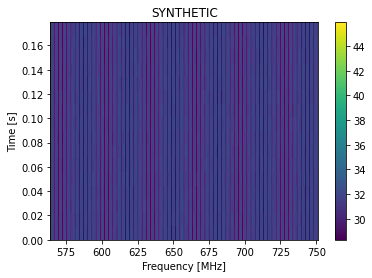

In [353]:
wf = bl.Waterfall('test.rawspec.0000.fil')
wf.plot_waterfall()

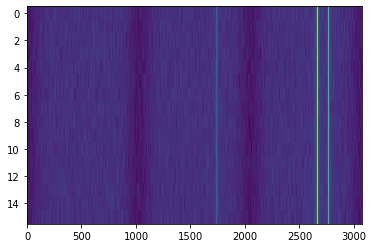

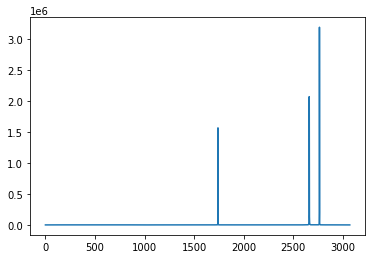

In [359]:
plt.imshow(db(wf.data[:, 0, int(10.*1024):int(13*1024)]), aspect='auto', interpolation='none')
plt.show()

plt.plot(np.mean(wf.data[:, 0, int(10.*1024):int(13*1024)], axis=0))

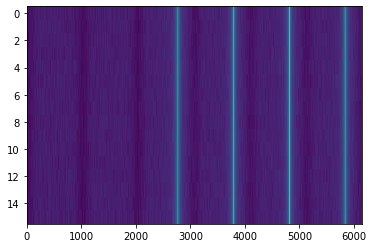

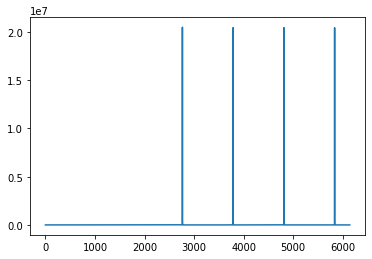

In [366]:
wf = bl.Waterfall('test_0.rawspec.0000.fil')

plt.imshow(db(wf.data[:, 0, int(0.*1024):int(6*1024)]), aspect='auto', interpolation='none')
plt.show()

plt.plot(np.mean(wf.data[:, 0, int(0.*1024):int(6*1024)], axis=0))

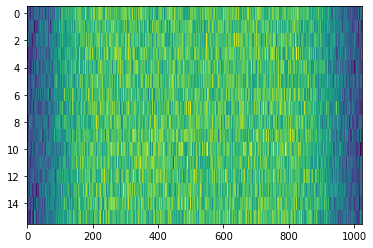

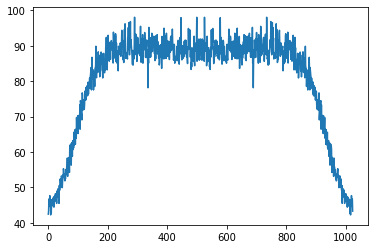

In [368]:
block = 0
plt.imshow(db(wf.data[:, 0, int(block*1024):int((block+1)*1024)]), aspect='auto', interpolation='none')
plt.show()

plt.plot(np.mean(wf.data[:, 0, int(block*1024):int((block+1)*1024)], axis=0))

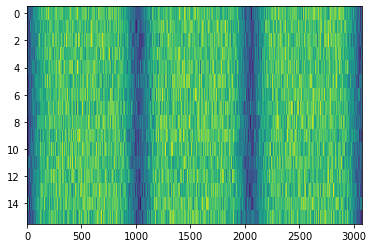

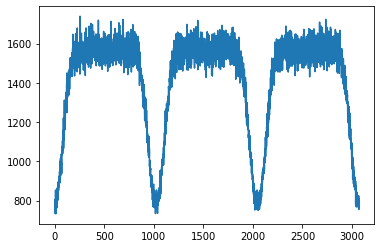

In [348]:
plt.imshow(db(wf.data[:, 0, int(-3*1024):]), aspect='auto', interpolation='none')
plt.show()
plt.plot(np.mean(wf.data[:, 0, int(-3*1024):], axis=0))

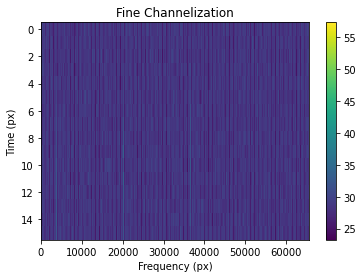

In [314]:
XX_psd = stg.voltage.get_waterfall_from_raw('test.0000.raw',
                                            134217728,
                                            num_chans=64,
                                            int_factor=32,
                                            fftlength=1024)
plt.imshow(db(XX_psd), 
           cmap='viridis', 
           aspect='auto', 
           interpolation='none')
plt.colorbar()
plt.xlabel("Frequency (px)")
plt.ylabel("Time (px)")
plt.title("Fine Channelization")
plt.show()

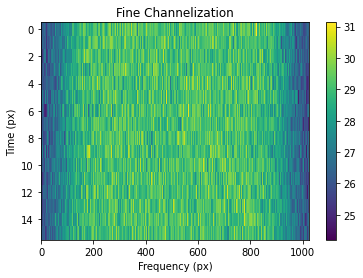

In [296]:
plt.imshow(db(XX_psd)[:, 0:1024], 
           cmap='viridis', 
           aspect='auto', 
           interpolation='none')
plt.colorbar()
plt.xlabel("Frequency (px)")
plt.ylabel("Time (px)")
plt.title("Fine Channelization")
plt.show()

In [1]:
import numpy as np

In [10]:
(2 << 2) + 5 

13

In [11]:
-2 << 2

-8

In [19]:
a = -6
b = -3
a * 16 + b

-99

In [20]:
(a << 4) + b

-99

In [16]:
99 >> 4

6

In [23]:
bin(8)[2:].zfill(4)

'1001010'

In [24]:
bin(-7)

'-0b111'

In [25]:
# Test reading synthetic raw
with open('test_4bit.0000.raw', "rb") as f:
    i = 1
    chunk = f.read(80)
    print(chunk)
    while b'END    ' not in chunk:
        chunk = f.read(80)
        print(chunk)
        i += 1
    chunk = f.read((512 - (80 * i % 512)))
    print(chunk)
    
    chunk = f.read(2097152//4)
#     print(chunk)
print(i)

b"BACKEND = 'GUPPI   '                                                            "
b"TELESCOP= 'SETIGEN '                                                            "
b"OBSERVER= 'SETIGEN '                                                            "
b"PROJID  = 'AGBT20B_999_22'                                                      "
b"FRONTEND= 'RcvrArray18_26'                                                      "
b'NRCVR   =                    2                                                  '
b"FD_POLN = 'CIRC    '                                                            "
b'BMAJ    = 0.009263915095687008                                                  '
b'BMIN    = 0.009263915095687008                                                  '
b"SRC_NAME= 'SYNTHETIC'                                                           "
b"TRK_MODE= 'TRACK   '                                                            "
b"RA_STR  = '04:41:45.7920'                                                 

In [ ]:
antenna1 = stg.voltage.Antenna(sample_rate=sample_rate, num_pols=2)
antenna2 = stg.voltage.Antenna(sample_rate=sample_rate, num_pols=2)



antenna2.foreground.x.add_noise_source()
antenna2.foreground.y.add_noise_source()
antenna2.get_background(antenna=antenna1,
                                   delay=3, # num samples delay
                                  )




antenna.foreground.x, foreground.y, background.x, foreground.y are each DataStreams?
antenna.x.foreground, antenna.x.background; antenna.y.foreground, antenna.y.background




antenna1.get_samples(1000)

antenna1.background.v[3:] is what antenna2 sees... but if I need 1000 samples
everywhere, I'd really need to get 1000+3 samples in total...
>> so far looks like using random seeds cleverly is probably an easier solution to this
that would save memory as well

can start noise from "antenna0"


antenna_array = stg.voltage.AntennaArray(num_antennas=64,
                                         sample_rate=3e9,
                                         num_pols=2)

###############
import sys
        
        
class Antenna(object):
    def __init__(self,
                 sample_rate,
                 num_pols,
                 seed=None,
                 delay=0):
        self.rng = np.random.RandomState(seed)
        self.delay = delay
        
        self.sample_rate = unit_utils.get_value(sample_rate, u.Hz)
        self.num_pols = num_pols
        
        self.x = stg.voltage.DataStream(sample_rate,
                                        self.rng.randint(sys.maxsize))
        
        if num_pols == 2:
            self.y = stg.voltage.DataStream(sample_rate,
                                            self.rng.randint(sys.maxsize))
        
        self.bg_cache = [None, None]
        
    def get_samples(self, num_samples):
        if num_pols == 2:
            return self.x.get_samples(num_samples), self.y.get_samples(num_samples)
        else:
            return self.x.get_samples(num_samples)

class MultiAntennaArray(object):
    def __init__(self,
                 num_antennas,
                 sample_rate,
                 num_pols=2,
                 delays=array of integer phase delays,
                 seed=None):
        self.rng = np.random.RandomState(seed)
        self.delays = delays
        self.max_delay = np.max(delays)
        
        self.num_antennas = num_antennas
        self.sample_rate = unit_utils.get_value(sample_rate, u.Hz)
        self.num_pols = num_pols
        self.start_obs = True
        
        
        self.x_bg = stg.voltage.DataStream(sample_rate,
                                           self.rng.randint(sys.maxsize))
        
        if num_pols == 2:
            self.y_bg = stg.voltage.DataStream(sample_rate,
                                               self.rng.randint(sys.maxsize))
        
        self.antennas = []
        for i in range(self.num_antennas):
            antenna = stg.voltage.Antenna(sample_rate,
                                          num_pols,
                                          self.rng.randint(sys.maxsize),
                                          delay=delays[i])
            self.antennas.append(antenna)
            
    def get_samples(self, num_samples):
        # Check that num_samples is always larger than the maximum antenna delay
        assert num_samples > self.max_delay
        
        if self.start_obs:
            bg_num_samples = num_samples + self.max_delay
            self.start_obs = False
        else:
            bg_num_samples = num_samples
        self.x_bg.get_samples(bg_num_samples)
        if num_pols == 2:
            self.y_bg.get_samples(bg_num_samples)
        
        for antenna in self.antennas:
            antenna.x.get_samples(num_samples)
            if self.start_obs:
                bg_x = self.x_bg.v[self.max_delay-antenna.delay:-antenna.delay]
            else:
                bg_x = np.concatenate([antenna.bg_cache[0], self.x_bg.v])[:-antenna.delay]
            antenna.bg_cache[0] = self.x_bg.v[-antenna.delay:]
            antenna.x.v += bg_x
            
            if num_pols == 2:
                antenna.y.get_samples(num_samples)
                if self.start_obs:
                    bg_y = self.y_bg.v[self.max_delay-antenna.delay:-antenna.delay]
                else:
                    bg_y = np.concatenate([antenna.bg_cache[1], self.y_bg.v])[:-antenna.delay]
                antenna.bg_cache[1] = self.y_bg.v[-antenna.delay:]
                antenna.y.v += bg_y
                
        return [[antenna.x.v, antenna.y.v] for antenna in self.antennas]

In [5]:
import numpy as np
rng = np.random.RandomState(42)
rng.rand(10)

array([0.37454012, 0.95071431, 0.73199394, 0.59865848, 0.15601864,
       0.15599452, 0.05808361, 0.86617615, 0.60111501, 0.70807258])

In [7]:
rng1 = np.random.RandomState(42)
rng1.rand(3)
rng1.rand(10)

array([0.59865848, 0.15601864, 0.15599452, 0.05808361, 0.86617615,
       0.60111501, 0.70807258, 0.02058449, 0.96990985, 0.83244264])

In [13]:
a = np.random.randint(0, 10, 5)
print(a)

np.max(a) - a

[4 5 5 8 4]


array([4, 3, 3, 0, 4])

In [14]:
import sys
sys.maxsize

9223372036854775807

In [29]:
(300 * 3e9 / 8 / 1024 - 1) * 8 * 2 * 2 * 1024 / 134217728

26822.089904785156

In [3]:
wf = bl.Waterfall('test_large.rawspec.0000.fil', max_load=8)
# wf.plot_waterfall()

blimpy.io.base_reader WARNING  Setting data limit != 1GB, please handle with care!


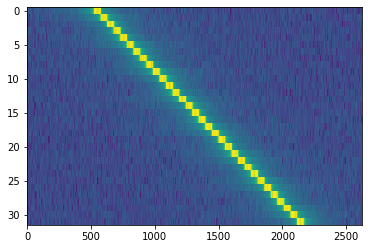

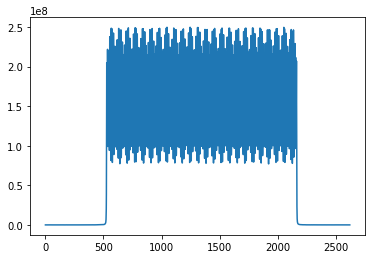

In [22]:
plt.imshow(db(wf.data[:, 0, int(12.6995*1048576):int(12.702*1048576)]), aspect='auto', interpolation='none')
plt.show()

plt.plot(np.mean(wf.data[:, 0, int(12.6995*1048576):int(12.702*1048576)], axis=0))

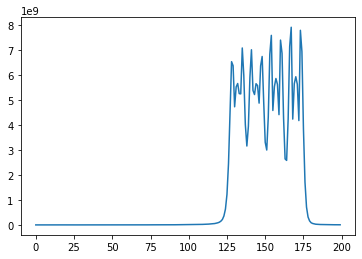

In [25]:
plt.plot(wf.data[0, 0, int(12.6995*1048576):int(12.702*1048576)][400:600])

In [3]:
import sys
sys.path.insert(0, "/home/bryanb/setigen/")
import setigen as stg

In [2]:
import cupy as cp
print(cp.cuda.runtime.getDeviceCount())

4


In [4]:
int(4.2345)

4

In [5]:
2 * 2 * 64 * 8 * 1 * 64

131072

In [6]:
134217728 / 131072

1024.0

In [9]:
import cupy as xp
rng = xp.random.RandomState()
rng

In [11]:
a = rng.randint(sys.maxsize)
a

array(6197523810710875353)

In [12]:
type(a)

cupy.core.core.ndarray

In [15]:
xp.asnumpy(a)

array(6197523810710875353)

In [16]:
xp.random.RandomState(int(a))

In [20]:
[1,2,3][3:]

[]

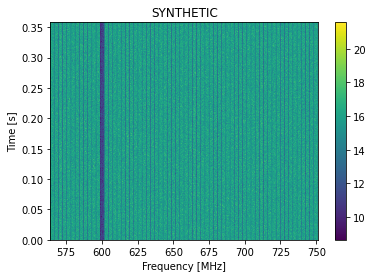

In [47]:
wf = bl.Waterfall('test_4bit.rawspec.0000.fil')
wf.plot_waterfall()

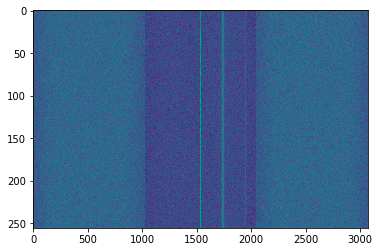

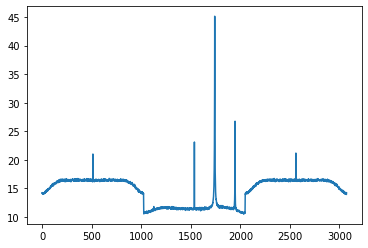

In [48]:
plt.imshow(db(wf.data[:, 0, int(11*1024):int(14*1024)]), aspect='auto', interpolation='none')
plt.show()

plt.plot(db(np.mean(wf.data[:, 0, int(11*1024):int(14*1024)], axis=0)))

In [52]:
-4 & 15

12

In [ ]:
XX_psd = stg.voltage.get_waterfall_from_raw('test.0000.raw',
                                            524288,
                                            int_factor=2,
                                            fftlength=256)
plt.imshow(db(XX_psd), 
           cmap='viridis', 
           aspect='auto', 
           interpolation='none')
plt.colorbar()
plt.xlabel("Frequency (px)")
plt.ylabel("Time (px)")
plt.title("Fine Channelization")
plt.show()

In [61]:
from bitstring import Bits
b = Bits(int=6, length=4)
b.bin, b

('0110', Bits('0x6'))

In [71]:
a = -6
b = 3

print(Bits(int=a, length=4).bin, Bits(int=b, length=4).bin)

if b < 0:
    b += 16
z = 16 * a + b
print(Bits(int=z, length=8).bin)

1010 0011
10100011


In [76]:
-8 * 16

-128

In [77]:
for a in (np.arange(16)-8):
    for b in (np.arange(16)-8):
        target = Bits(int=a, length=4).bin+Bits(int=b, length=4).bin
        
        if b < 0:
            b += 16
        z = 16 * a + b
        if Bits(int=z, length=8).bin != target:
            print('OH NO')
            break

In [6]:
int(300 * 3e9 * 2 * 2 * 8 / 8 / 134217728 / 1024 * 64)

1676

In [7]:
1676/128

13.09375

In [5]:
1024/64

16.0

In [8]:
isinstance([], list)

True

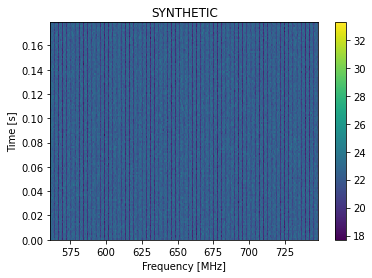

In [19]:
wf = bl.Waterfall('test_alias.rawspec.0000.fil')
wf.plot_waterfall()

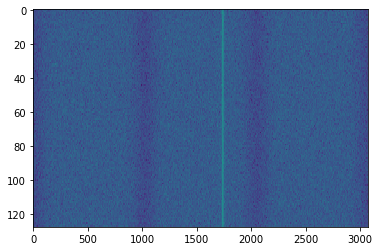

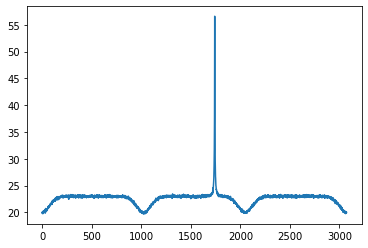

In [20]:
plt.imshow(db(wf.data[:, 0, int(11*1024):int(14*1024)]), aspect='auto', interpolation='none')
plt.show()

plt.plot(db(np.mean(wf.data[:, 0, int(11*1024):int(14*1024)], axis=0)))

In [1]:
a=134217728/64/4
a

524288.0

In [2]:
a**0.5

724.0773439350247

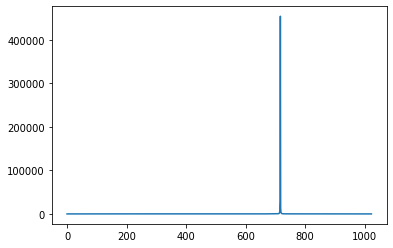

In [9]:
plt.plot((np.mean(wf.data[:, 0, int(12*1024):int(13*1024)], axis=0)))

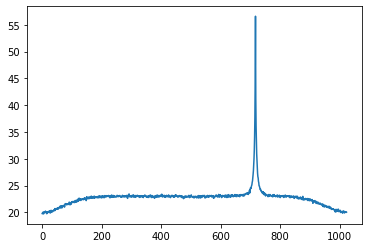

In [21]:
x = (np.mean(wf.data[:, 0, int(12*1024):int(13*1024)], axis=0))
plt.plot(db(x))

In [22]:
np.mean(x[200:600])

198.92622

In [23]:
np.std(x[200:600])

6.102659

In [12]:
np.max(x)

454474.34

In [13]:
np.max(x)/np.mean(x[200:600])

2284.6377

In [25]:
(np.max(x)-np.mean(x[200:600])) / np.std(x[200:600])

74438.93

In [14]:
a=134217728/64/4*1024
a**0.5

23170.47500592079

In [32]:
stg.pipeline.get_total_obs_num_samples(num_blocks=1, length_mode='num_blocks')

536870912.0

In [64]:
10/stg.pipeline.get_total_obs_num_samples(num_blocks=1, length_mode='num_blocks')**0.5

0.00043158372875155485

In [65]:
0.00043158372875155485*1024*4

1.7677669529663687

In [29]:
134217728/64/4*1024

536870912.0

In [16]:
(300*3e9)**0.5

948683.2980505138

In [6]:
np.linspace(4, 4+5*2, 5, endpoint=False)

array([ 4.,  6.,  8., 10., 12.])

In [8]:
type(3e9)

float

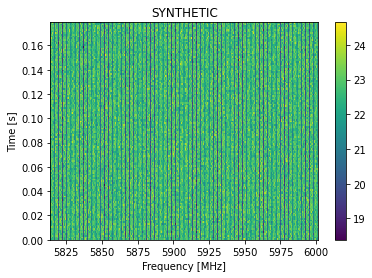

In [52]:
wf = bl.Waterfall('/datax/scratch/bbrzycki/data/raw_files/test_snr.rawspec.0000.fil')
wf.plot_waterfall()

In [53]:
wf.header

{'machine_id': 20,
 'telescope_id': -1,
 'src_raj': <Angle 4.69605333 hourangle>,
 'src_dej': <Angle 25.6911 deg>,
 'az_start': 0.0,
 'za_start': 0.0,
 'data_type': 1,
 'fch1': 6001.46484375,
 'foff': -0.00286102294921875,
 'nchans': 65536,
 'nbeams': 1,
 'ibeam': -1,
 'nbits': 32,
 'tstart': 59114.183657407404,
 'tsamp': 0.001398101333333332,
 'nifs': 1,
 'source_name': 'SYNTHETIC',
 'rawdatafile': 'test_snr.0000.raw'}

In [34]:
sample_rate = 3e9
num_taps = 8
num_branches = 1024

chan_bw = sample_rate/num_branches
(6e9 - chan_bw * 10.3)/1e6, (6e9 - chan_bw * 12.7)/1e6

(5969.82421875, 5962.79296875)

In [55]:
chan_bw * (24.1) / 1e6

70.60546875

In [58]:
500*300/3

50000.0

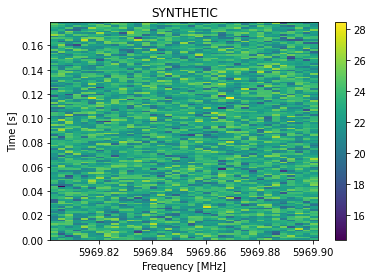

In [41]:
wf = bl.Waterfall('/datax/scratch/bbrzycki/data/raw_files/test_snr.rawspec.0000.fil',
                  f_start=5969.8,
                  f_stop=5969.9)
wf.plot_waterfall()

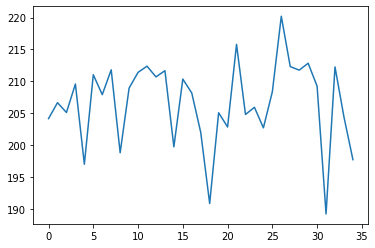

In [42]:
x = (np.mean(wf.data[:, 0, :], axis=0))
plt.plot((x))

In [43]:
np.std(x[5:20])

6.05684

In [44]:
np.max(x)-np.mean(x[5:20])

13.5000305

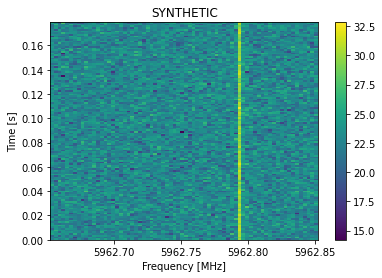

In [48]:
wf = bl.Waterfall('/datax/scratch/bbrzycki/data/raw_files/test_snr.rawspec.0000.fil',
                  f_start=5962.65,
                  f_stop=5962.85)
wf.plot_waterfall()

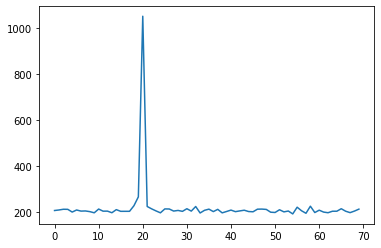

In [49]:
x = (np.mean(wf.data[:, 0, :], axis=0))
plt.plot((x))

In [50]:
np.std(x[30:60])

8.212004

In [51]:
np.max(x)-np.mean(x[30:60])

842.768

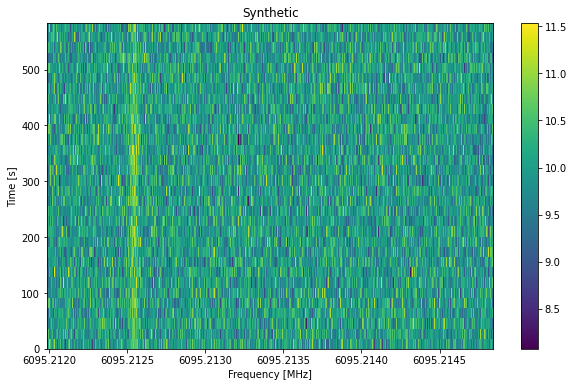

In [62]:
frame = stg.Frame(fchans=1024*u.pixel,
                  tchans=32*u.pixel,
                  df=2.7939677238464355*u.Hz,
                  dt=18.25361108*u.s,
                  fch1=6095.214842353016*u.MHz)
noise = frame.add_noise(x_mean=10, noise_type='chi2')
signal = frame.add_signal(stg.constant_path(f_start=frame.get_frequency(index=200),
                                            drift_rate=0*u.Hz/u.s),
                          stg.constant_t_profile(level=frame.get_intensity(snr=10)),
                          stg.gaussian_f_profile(width=40*u.Hz),
                          stg.constant_bp_profile(level=1))

fig = plt.figure(figsize=(10, 6))
frame.bl_render()
plt.show()